In [ ]:
# Project Description 

# The goal of this project is to classify images of animals using deep learning 
# Classifying images of animals can help in wildlife consveration and agricultural fields - both very important for keeping our world safe in times
# of increased climate change! 

In [23]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import kagglehub 

# Download latest version
# kaggle = kagglehub.dataset_download("alessiocorrado99/animals10")

DATASET_PATH = r"C:\Users\alflor\.cache\kagglehub\datasets\alessiocorrado99\animals10\versions\2\raw-img"

print("Path to dataset files:", dataset_path)

# Set global constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
EPOCHS = 10

Path to dataset files: C:\Users\alflor\.cache\kagglehub\datasets\alessiocorrado99\animals10\versions\2


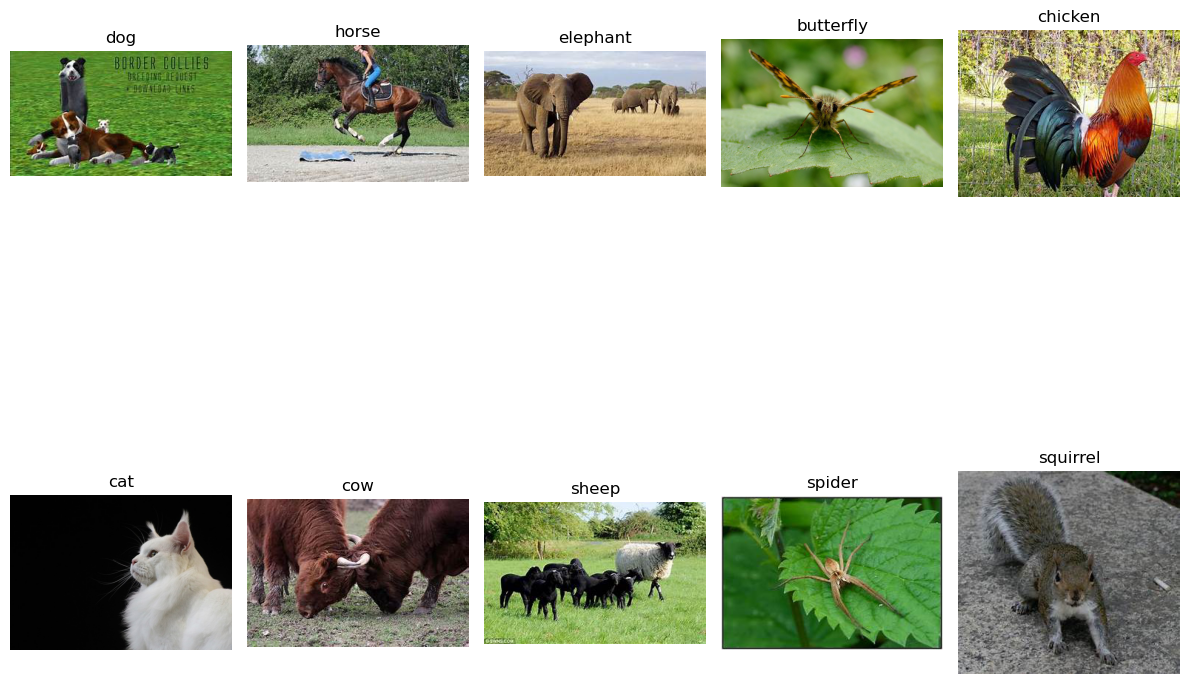

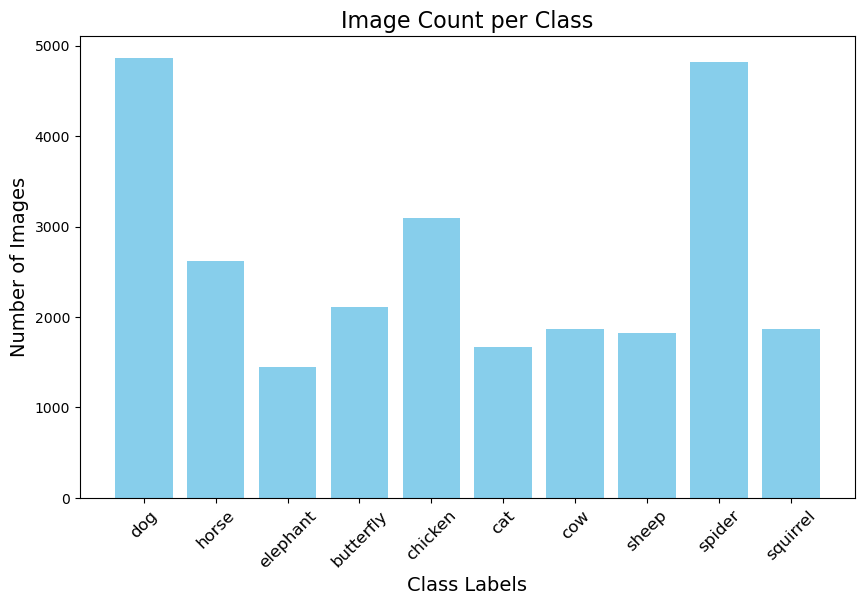

In [43]:
# Step 1: Exploratory Data Analysis (EDA)

# Original data is in Italian so let's translate to English 
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", 
             "mucca": "cow", "ragno": "spider", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

# Look at some sample images
def display_sample_images(dataset_path, translate_dict):
    class_names = os.listdir(dataset_path)
    plt.figure(figsize=(12, 12))
    for i, class_name in enumerate(class_names[:10]): # 10 animal categories 
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):  # Ensure it's a directory
            img_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            if img_files:  
                img_file = random.choice(img_files)
                img_path = os.path.join(class_dir, img_file)
                try:
                    img = plt.imread(img_path)
                    plt.subplot(2, 5, i + 1)
                    plt.imshow(img)
                    # Use translated name if available
                    plt.title(translate_dict.get(class_name, class_name))
                    plt.axis('off')
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    plt.tight_layout()
    plt.show()

# Call the function with your dataset path and translate dictionary
display_sample_images(DATASET_PATH, translate)

def plot_label_distribution_with_translation(dataset_path, translate_dict):
    # Dictionary to store label counts
    label_counts = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_path):  # Check if it's a directory
            num_images = len(os.listdir(class_path))  # Count number of images
            translated_label = translate_dict.get(class_dir, class_dir)  # Translate name if available
            label_counts[translated_label] = num_images

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
    plt.title("Image Count per Class", fontsize=16)
    plt.xlabel("Class Labels", fontsize=14)
    plt.ylabel("Number of Images", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

# Call the function with your dataset path and translate dictionary
plot_label_distribution_with_translation(DATASET_PATH, translate)

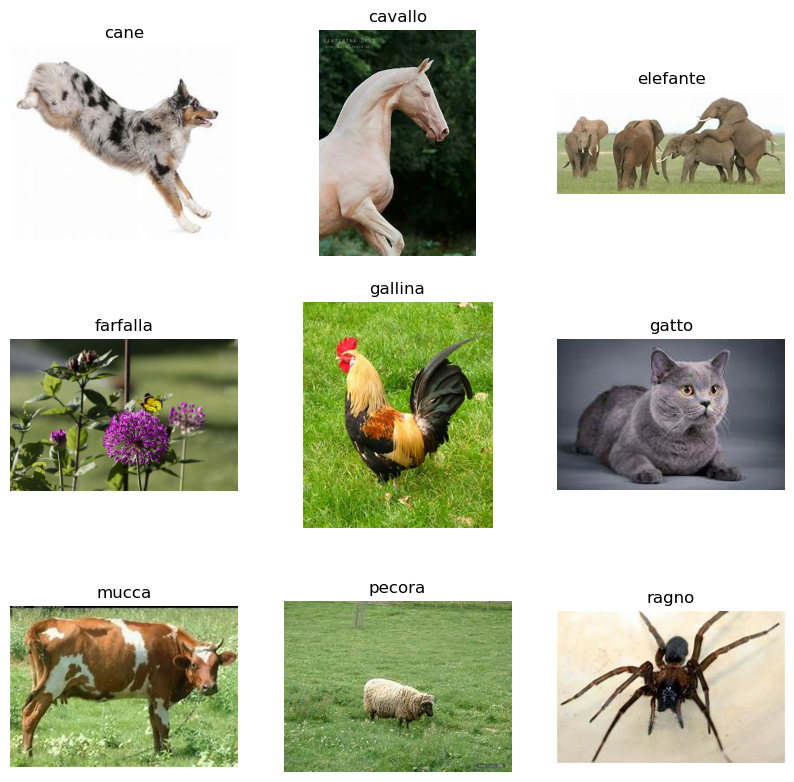

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


C:\Users\alflor\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1255s 2s/step - accuracy: 0.4556 - loss: 1.6409 - val_accuracy: 0.7095 - val_loss: 0.8876
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1290s 2s/step - accuracy: 0.6627 - loss: 1.0098 - val_accuracy: 0.7381 - val_loss: 0.7923
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1332s 2s/step - accuracy: 0.7033 - loss: 0.8776 - val_accuracy: 0.7638 - val_loss: 0.7342
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1498s 2s/step - accuracy: 0.7332 - loss: 0.8067 - val_accuracy: 0.7657 - val_loss: 0.7123
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1525s 2s/step - accuracy: 0.7385 - loss: 0.7838 - val_accuracy: 0.7729 - val_loss: 0.6803
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1507s 2s/step - accuracy: 0.7504 - loss: 0.7417 - val_accuracy: 0.7703 - val_loss: 0.6950
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1827s 3s/step - accuracy: 0.7567 - loss: 0.7258 - val_accuracy: 0.7842 - val_loss: 0.6545
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 1483s 2s/step - accuracy: 0.7645 - loss: 0.7040 - 

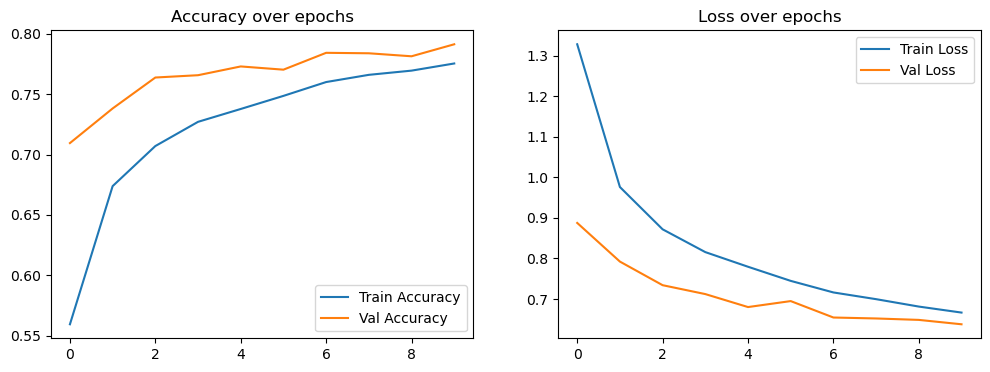

164/164 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17       972
           1       0.11      0.11      0.11       524
           2       0.06      0.07      0.07       289
           3       0.07      0.07      0.07       422
           4       0.12      0.13      0.13       619
           5       0.06      0.05      0.05       333
           6       0.06      0.04      0.05       373
           7       0.08      0.06      0.07       364
           8       0.19      0.21      0.20       964
           9       0.05      0.05      0.05       372

    accuracy                           0.12      5232
   macro avg       0.10      0.10      0.10      5232
weighted avg       0.12      0.12      0.12      5232



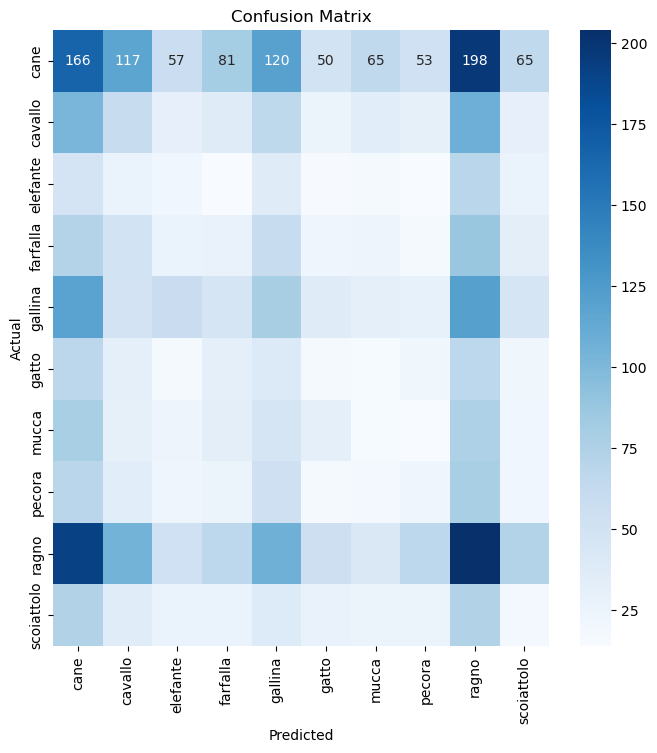

In [25]:
# Step 2: Data Preprocessing
def prepare_data_generators():
    train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                       validation_split=0.2,
                                       horizontal_flip=True,
                                       rotation_range=20,
                                       zoom_range=0.2)

    train_generator = train_datagen.flow_from_directory(
        DATASET_PATH,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')

    validation_generator = train_datagen.flow_from_directory(
        DATASET_PATH,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

    return train_generator, validation_generator

# Step 3: Model Building
def build_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False  # Freeze base model layers

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(len(os.listdir(DATASET_PATH)), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

# Main workflow
if __name__ == "__main__":
    # Display sample images
    display_sample_images(DATASET_PATH, translate)

    # Prepare data
    train_generator, validation_generator = prepare_data_generators()

    # Build and train model
    model = build_model()
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        verbose=1
    )

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss over epochs')
    plt.show()

# Evaluate the model
val_labels = validation_generator.classes
val_preds = np.argmax(model.predict(validation_generator), axis=-1)
print("Classification Report:\n", classification_report(val_labels, val_preds))

# Translate labels for confusion matrix 
translated_labels = {key: translate[key] for key in train_generator.class_indices.keys() if key in translate}

cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[translated_labels[label] for label in train_generator.class_indices.keys()],
             yticklabels=[translated_labels[label] for label in train_generator.class_indices.keys()])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# So this is okay as a strating point but let's see if we can still improve that result 

#1 Data agumentation and additiona transforamtions will help the model be more prepared and accurate with unseen data 
#2 Re-balance the classes. We saw in the EDA step that the classes were not balanced and there a lot more spider/dog images than the other animals 
#3 Add a dropout layer to reduce overfitting 
#4 Lower the batch size so it can train more sufficiently 

In [122]:
# Round 2 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import os
import shutil

# Constants
dataset_path = r"C:\Users\alflor\.cache\kagglehub\datasets\alessiocorrado99\animals10\versions\2\raw-img"

train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'validation')
test_dir = os.path.join(dataset_path, 'test')

# Create main train, validation, and test directories
for directory in [train_dir, valid_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Exclude these directories from processing as class folders
excluded_folders = {'train', 'validation', 'test'}

# Process each class
for class_name in os.listdir(dataset_path):
    if class_name in excluded_folders:
        print(f"Skipping directory '{class_name}'...")
        continue

    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):  # Ensure it's a class folder
        # Get all image paths for the current class
        image_files = [
            os.path.join(class_folder, img) 
            for img in os.listdir(class_folder)
        ]
        
        if len(image_files) > 0:
            # Split images into train, validation, and test
            train_files, temp_files = train_test_split(
                image_files, test_size=0.2, random_state=42
            )
            valid_files, test_files = train_test_split(
                temp_files, test_size=0.5, random_state=42
            )

            # Create subfolders for the current class
            for folder, files in zip(
                [train_dir, valid_dir, test_dir], 
                [train_files, valid_files, test_files]
            ):
                class_subdir = os.path.join(folder, class_name)
                os.makedirs(class_subdir, exist_ok=True)
                for file in files:
                    if os.path.isfile(file):
                        shutil.copy(file, os.path.join(class_subdir, os.path.basename(file)))

            print(f"Processed class '{class_name}' - Train: {len(train_files)}, Validation: {len(valid_files)}, Test: {len(test_files)}")
        else:
            print(f"Class '{class_name}' contains no images and was skipped.")

print("Data split and folders populated successfully!")

# ImageDataGenerator for loading images
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get valid class names from the generators
valid_class_names = list(train_generator.class_indices.keys())
print("Class names:", valid_class_names)

# MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(valid_class_names), activation='softmax')  # Number of classes
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=valid_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

Processed class 'cane' - Train: 3890, Validation: 486, Test: 487
Processed class 'cavallo' - Train: 2098, Validation: 262, Test: 263
Processed class 'elefante' - Train: 1156, Validation: 145, Test: 145
Processed class 'farfalla' - Train: 1689, Validation: 211, Test: 212
Processed class 'gallina' - Train: 2478, Validation: 310, Test: 310
Processed class 'gatto' - Train: 1334, Validation: 167, Test: 167
Processed class 'mucca' - Train: 1492, Validation: 187, Test: 187
Processed class 'pecora' - Train: 1456, Validation: 182, Test: 182
Processed class 'ragno' - Train: 3856, Validation: 482, Test: 483
Processed class 'scoiattolo' - Train: 1489, Validation: 186, Test: 187
Skipping directory 'test'...
Skipping directory 'train'...
Skipping directory 'validation'...
Data split and folders populated successfully!
Found 20938 images belonging to 10 classes.
Found 2618 images belonging to 10 classes.
Found 2623 images belonging to 10 classes.
Class names: ['cane', 'cavallo', 'elefante', 'farfalla

C:\Users\alflor\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 701s 1s/step - accuracy: 0.6590 - loss: 1.0746 - val_accuracy: 0.9011 - val_loss: 0.3173
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 486s 741ms/step - accuracy: 0.8673 - loss: 0.4066 - val_accuracy: 0.9087 - val_loss: 0.2862
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 490s 748ms/step - accuracy: 0.8913 - loss: 0.3330 - val_accuracy: 0.9175 - val_loss: 0.2636
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 497s 759ms/step - accuracy: 0.9033 - loss: 0.3094 - val_accuracy: 0.9175 - val_loss: 0.2531
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 519s 792ms/step - accuracy: 0.9013 - loss: 0.2934 - val_accuracy: 0.9186 - val_loss: 0.2496
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 551s 841ms/step - accuracy: 0.9085 - loss: 0.2800 - val_accuracy: 0.9144 - val_loss: 0.2513
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 488s 744ms/step - accuracy: 0.9142 - loss: 0.2575 - val_accuracy: 0.9232 - val_loss: 0.2276
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 497s 759ms/step - accuracy: 0.9123 - lo

82/82 ━━━━━━━━━━━━━━━━━━━━ 52s 631ms/step


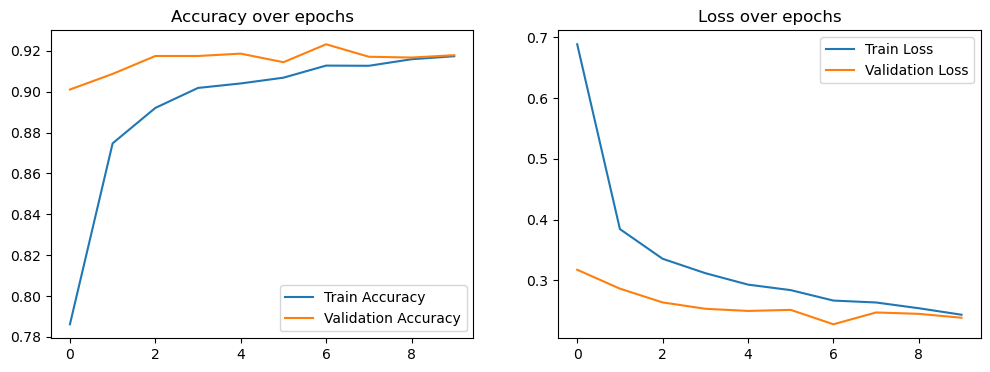

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.19      0.19       487
           1       0.10      0.10      0.10       263
           2       0.05      0.05      0.05       145
           3       0.07      0.07      0.07       212
           4       0.10      0.11      0.11       310
           5       0.06      0.06      0.06       167
           6       0.07      0.08      0.08       187
           7       0.07      0.06      0.06       182
           8       0.15      0.15      0.15       483
           9       0.05      0.05      0.05       187

    accuracy                           0.11      2623
   macro avg       0.09      0.09      0.09      2623
weighted avg       0.11      0.11      0.11      2623



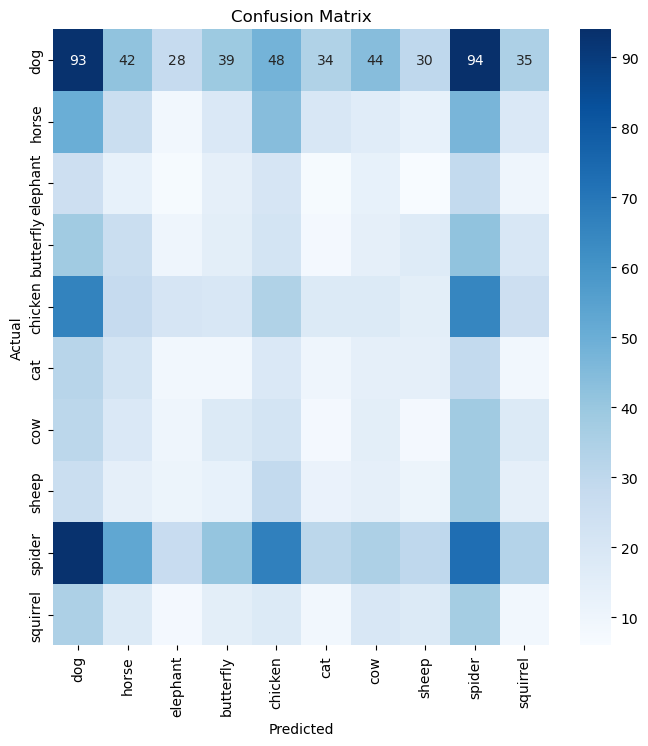

In [126]:
# Evaluation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Compare predictions with true labels
predictions = model.predict(test_generator)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

# Evaluate the model with the test data
test_labels = test_generator.classes
test_preds = np.argmax(predictions, axis=-1)

# Classification report
print("Classification Report:\n", classification_report(test_labels, test_preds))

# Assuming 'translate' exists as a dictionary for class labels, otherwise, map manually
translated_labels = {key: translate[key] for key in train_generator.class_indices.keys() if key in translate}

# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[translated_labels[label] for label in train_generator.class_indices.keys()],
             yticklabels=[translated_labels[label] for label in train_generator.class_indices.keys()])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()